In [1]:
import pandas as pd

In [2]:
from milestone1.question1 import get_play_by_play_season_gameType

match_type = 2

get_play_by_play_season_gameType("2015","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2016","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2017","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2018","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2019","0"+str(match_type),"data_saved/play_by_play")

100%|███████████████████████████████████████| 1271/1271 [03:08<00:00,  6.74it/s]


In [1]:
from milestone1.question4 import *
from utils import *

#les donnes des saisons régulière seulement!
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'
directory2019 = r'data_saved/play_by_play/2019/regular'


dir = get_current_dir()
df2015 = create_full_df(directory=directory2015, parent_dir=dir)
df2016 = create_full_df(directory=directory2016, parent_dir=dir)
df2017 = create_full_df(directory=directory2017, parent_dir=dir)
df2018 = create_full_df(directory=directory2018, parent_dir=dir)

# 2019/20 comme l' ensemble final des données test.
df2019 = create_full_df(directory=directory2019, parent_dir=dir)

In [5]:
df15_16 = pd.concat([df2015, df2016], ignore_index=True)
df17_18 = pd.concat([df2017, df2018], ignore_index=True)

#utilise les données 2015/16 - 2018/19 de la saison régulière pour créer vos ensembles d'entraînement et de validation.
df_train_val =  pd.concat([df15_16, df17_18], ignore_index=True).sample(frac=1)

In [6]:
df_train_val.head()

,Game_ID,Event_ID,Period_Number,Period_Time,Game_Time,Secondes_jeu,Shot_or_Goal,Shot_Type,Shooter,Team_of_Shooter,...,Est_un_but,Filet_vide,Last_event_type,Rebond,X_last_event,Y_last_event,Sec_from_lastEvent,Dis_from_lastEvent,Angle_change,Vitesse
156550,2017021066,298,3,14:59,54.98,3298.8,Shot,Wrist Shot,Noah Juulsen,MTL,...,0,0,Shot,True,48.0,-8.0,21.0,10.000000,33.164433,0.476190
306752,2018020853,172,2,07:13,27.21,1632.6,Shot,Snap Shot,Patrice Bergeron,BOS,...,0,0,Shot,True,-79.0,34.0,45.0,30.870698,100.372836,0.686016
123856,2016020952,250,3,08:11,48.18,2890.8,Shot,Snap Shot,Frank Vatrano,BOS,...,0,0,Missed Shot,False,67.0,-14.0,58.2,12.041595,0.000000,0.206900
242834,2018020670,184,2,11:32,31.53,1891.8,Shot,Backhand,Kiefer Sherwood,ANA,...,0,0,Missed Shot,False,-53.0,-23.0,25.2,31.780497,0.000000,1.261131
34271,2015020115,11,1,02:44,2.73,163.8,Shot,Slap Shot,Gabriel Landeskog,COL,...,0,0,Hit,False,99.0,19.0,12.0,178.765209,0.000000,14.897101


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teylouniseifu/ift-6758-a22/d2e4bc6546c64b22bfc311ffe4f1cc68



0.9056362625247568
0.41935483870967744


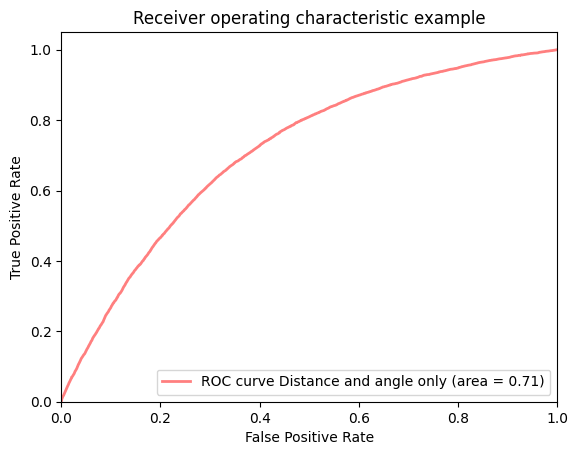

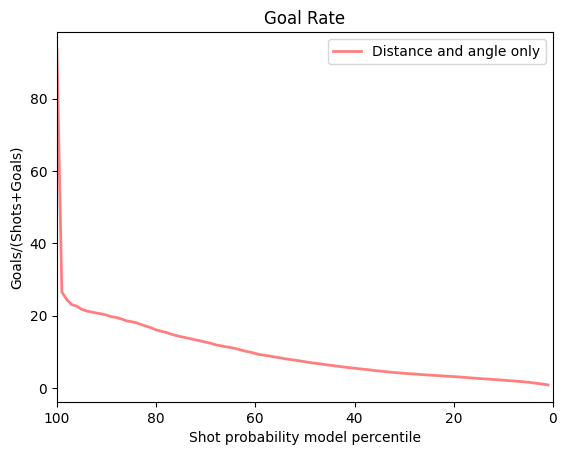

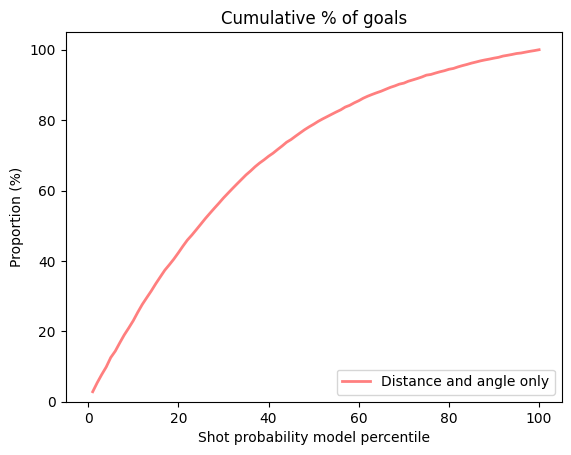

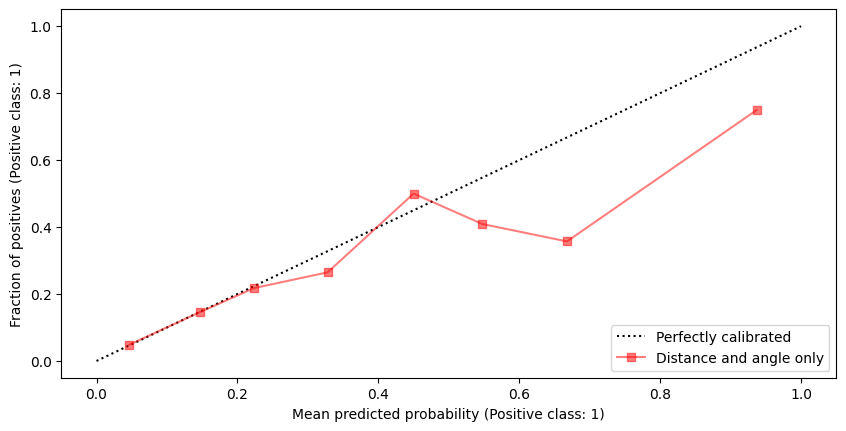

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'angle_and_distance'])

X = df_train_val[[ "Angle", 'Distance']]
Y = df_train_val[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)
print(precision)


experiment.set_model_graph(model)
experiment.log_model('Boosted tree(distance and angle)', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy(), y_pred, 'Distance and angle only', experiment)

#https://www.comet.com/teylouniseifu/ift-6758-a22/d2e4bc6546c64b22bfc311ffe4f1cc68

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teylouniseifu/ift-6758-a22/ec76d0ead41b4e57bc16ecb0062e1f56



Secondes_jeu           float64
Period_Number            int64
X_Coordinate           float64
Y_Coordinate           float64
Distance               float64
Angle                  float64
Shot_Type             category
Last_event_type       category
X_last_event           float64
Y_last_event           float64
Sec_from_lastEvent     float64
Dis_from_lastEvent     float64
Rebond                category
Angle_change           float64
Vitesse                float64
dtype: object
0.9062899401933715
[0.02442808 0.01819017 0.07484008 ... 0.07178339 0.15268628 0.08039903]
(102497, 1)


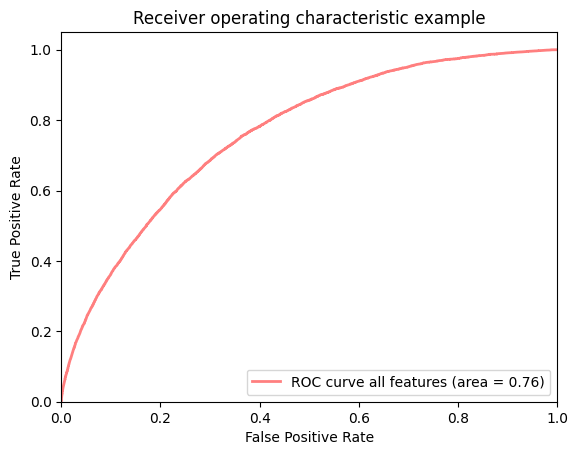

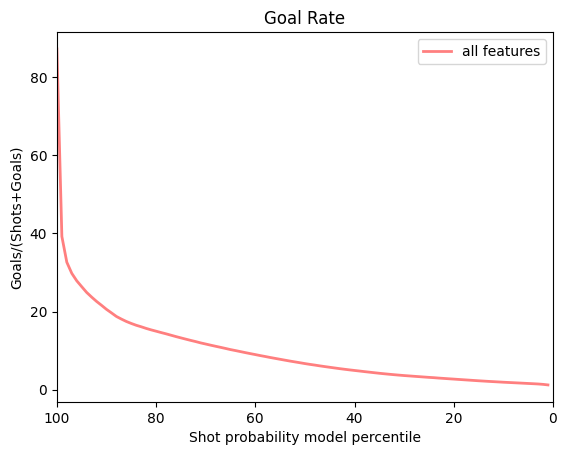

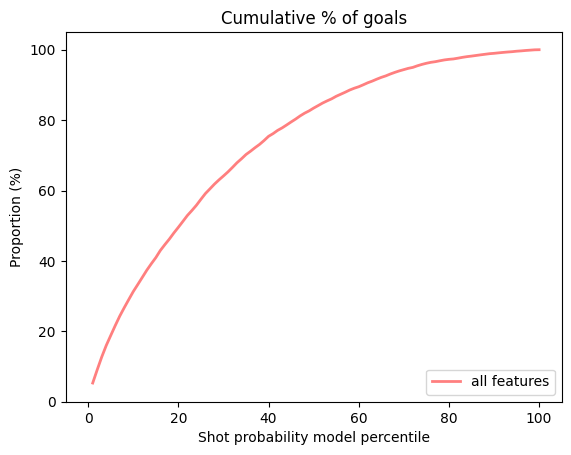

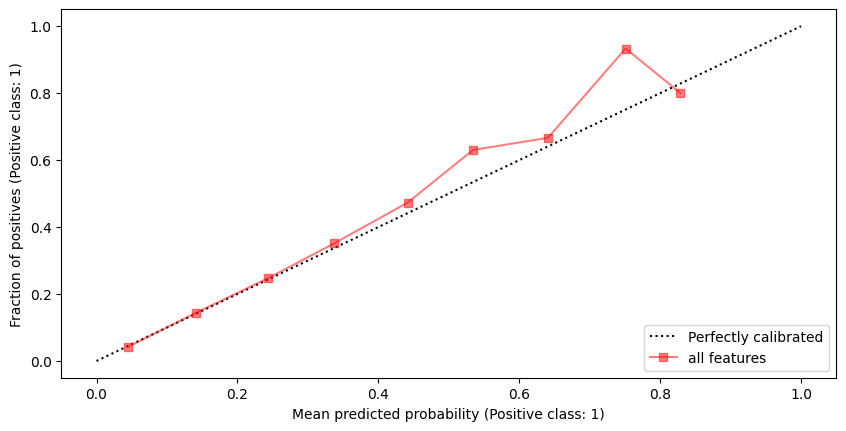

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'all_features'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 5, colsample_bytree= 0.8, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

print(X_train.dtypes)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

#ytest = y_test['Est_un_but']
print(y_pred)
print(y_test.shape)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(all features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'all features', experiment)

#https://www.comet.com/teylouniseifu/ift-6758-a22/ec76d0ead41b4e57bc16ecb0062e1f56

In [9]:
from utils import *

print(grid_search(X, Y["Est_un_but"], model))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 8, 'colsample_bytree': 0.9}


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/ec76d0ead41b4e57bc16ecb0062e1f56
COMET INFO:   Metrics:
COMET INFO:     precision : 0.6686390532544378
COMET INFO:     recall    : 0.011695301179879942
COMET INFO:     roc       : 0.7627649385219781
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (488.43 KB)
COMET INFO:     installed pa

Secondes_jeu          float64
Period_Number           int64
X_Coordinate          float64
Y_Coordinate          float64
Distance              float64
Angle                 float64
X_last_event          float64
Y_last_event          float64
Sec_from_lastEvent    float64
Dis_from_lastEvent    float64
Angle_change          float64
Vitesse               float64
dtype: object
0.9062996965764851


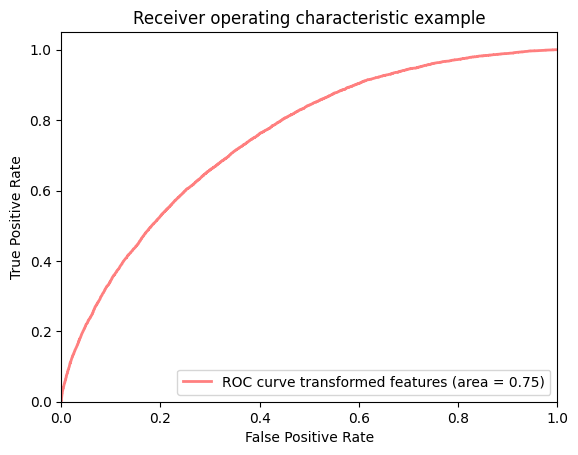

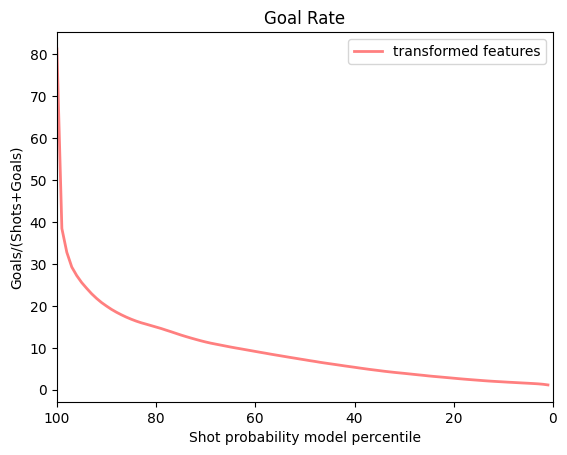

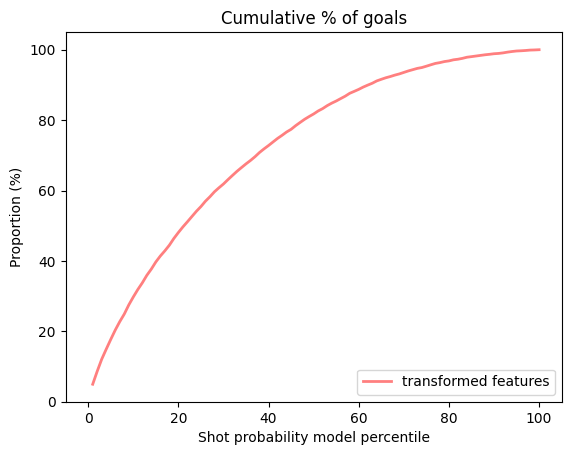

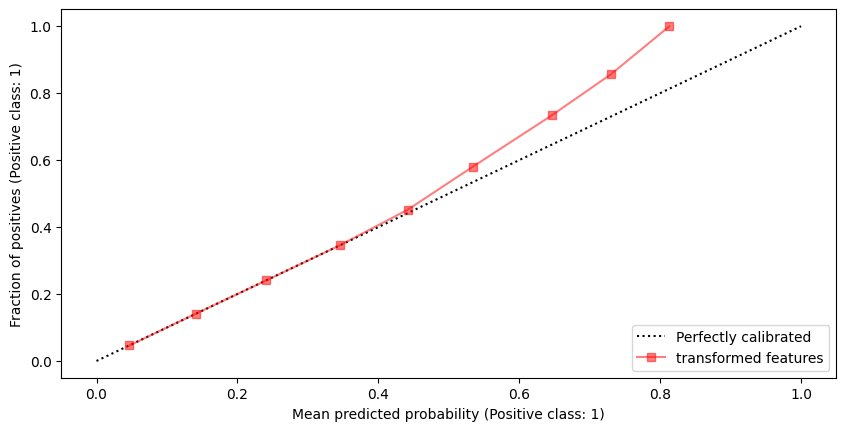

In [7]:
import ray
import comet_ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, chi2,  mutual_info_classif, mutual_info_regression, chi2, r_regression, f_classif, f_regression
from utils import *
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from ray.air.callbacks.comet import CometLoggerCallback
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'features_transformed'])

fs = SelectKBest(score_func=f_regression, k=8)
W=df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']].copy()
W = replace_nans(W)
W = replace_infs(W)
print(W.dtypes)
Y = df_train_val[["Est_un_but"]]
W = pd.DataFrame(fs.fit_transform(W, Y["Est_un_but"]))
#W["Rebond"]=df_train_val["Rebond"].astype("category")
#W["Last_event_type"]=df_train_val["Last_event_type"].astype("category")
#W["Shot_Type"]=df_train_val["Shot_Type"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(W, Y["Est_un_but"], test_size=0.33, random_state=10)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 0.9, min_child_weight= 5, max_depth= 8, gamma= 5, colsample_bytree= 0.7, eval_metric='auc', disable_default_eval_metric=True)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(transformed features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')


create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'transformed features', experiment)
#https://www.comet.com/teylouniseifu/ift-6758-a22/fa69d5a607d94932ae785d4e1bcaa7f8

In [51]:
from utils import *

print(grid_search(W, Y["Est_un_but"], model))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 8, 'gamma': 5, 'colsample_bytree': 0.7}


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, tensorboard, tensorflow, sklearn, keras. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/72323937fa81431691bebdd82277fdc0
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.9079680380889197
COMET INFO:     precision : 0.0
COMET INFO:     recall    : 0.0
COMET INFO:     roc       : 0.7149467860438519
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompresse

        Est_un_but
104035           1
81302            0
285420           0
258006           0
187696           0
...            ...
252107           0
289359           0
114347           0
190637           0
43523            0

[208099 rows x 1 columns]
[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
(20809, 12)
Epoch 1/10
5853/5853 [==============================] - 6s 875us/step - loss: 1.5966 - accuracy: 0.8704 - binary_crossentropy: 1.5966 - mean_squared_error: 0.1106 - val_loss: 0.6768 - val_accuracy: 0.9028 - val_binary_crossentropy: 0.6768 - val_mean_squared_error: 0.0954
Epoch 2/10
5853/5853 [==============================] - 5s 830us/step - loss: 0.3830 - accuracy: 0.8905 - binary_crossentropy: 0.3830 - mean_squared_error: 0.0948 - val_loss: 0.4322 - val_accuracy: 0.8119 - val_binary_crossentropy: 0.4322 - val_mean_squared_error: 0.1365
Epoch 3/10
5853/5853 [==============================] - 5s 841us/step - loss: 0.3380 - accuracy: 0.8974 - binary_crossentropy: 0.3380 -

/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


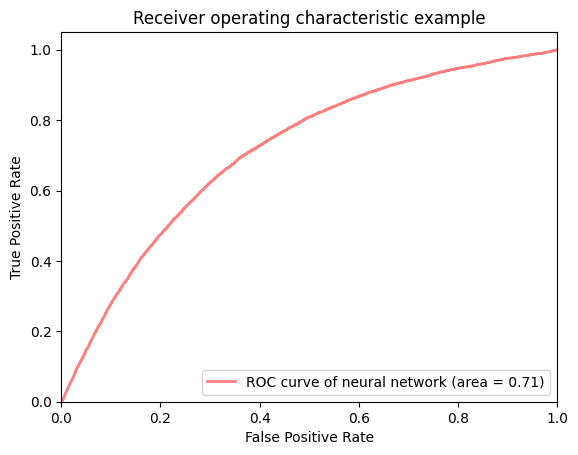

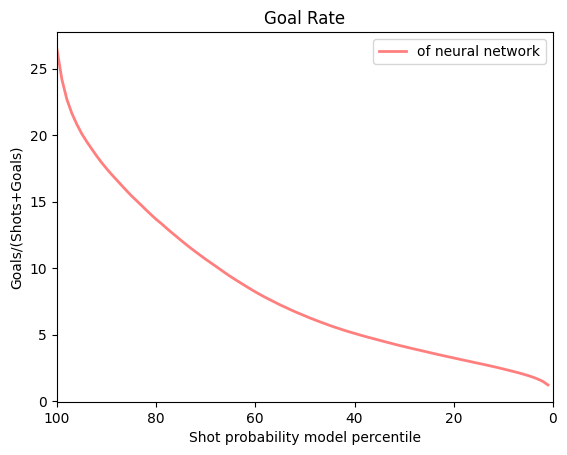

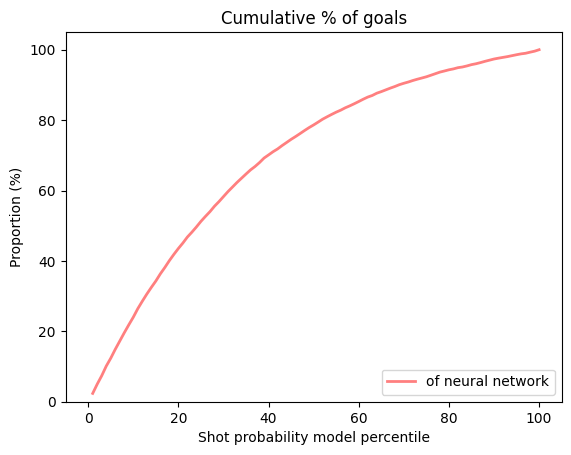

Stored 'info_neural_network' (tuple)


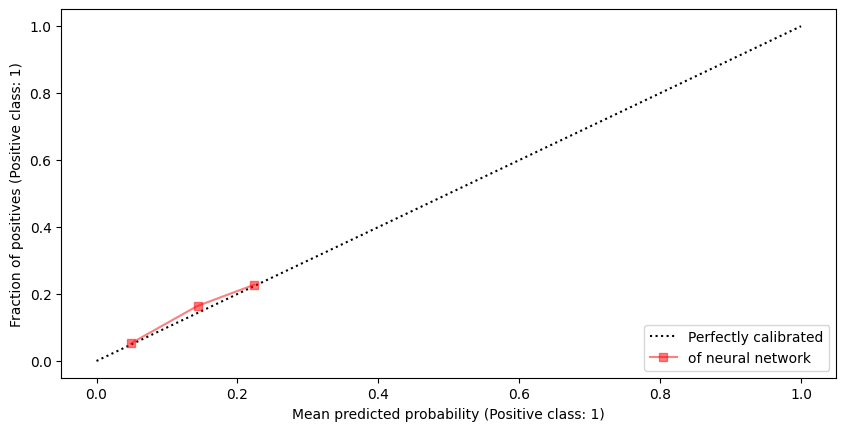

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
from sklearn.metrics import precision_score, recall_score
import comet_ml

from tensorflow import keras
from tensorflow.keras import activations, backend, layers
from tensorflow.keras.utils import to_categorical

experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question6', 'neural_network'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

inputs = keras.Input(shape=(X_train.shape[1]))

inner = layers.Flatten()(inputs)

inner = layers.Dense(32, activation='relu')(inner)
inner = layers.Dense(16, activation='relu')(inner)
inner = layers.Dense(4, activation='relu')(inner)

outputs = layers.Dense(1, activation='sigmoid')(inner)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy","mean_squared_error"]
)

print(y_train)

X_train=X_train.to_numpy()
y_train=y_train.to_numpy().reshape((y_train.shape[0]))

print(y_train)


Yv = y_train[:int(y_train.shape[0]/10)]
print(Yv)
Xv = X_train[:int(X_train.shape[0]/10), :].astype(np.float32)

Y = y_train[int(y_train.shape[0]/10):]
X = X_train[int(X_train.shape[0]/10):, :].astype(np.float32)

print(Yv)
print(Xv.shape)

history = model.fit(X,
                    Y,
                    batch_size=32,
                    epochs=10,
                    validation_data=(Xv, Yv))

y_pred = model.predict(X_test)
print(y_pred)
y_pred=y_pred.reshape(y_pred.shape[0])

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)
experiment.set_model_graph(model)

experiment.log_model('neural network for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

info_neural_network = create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'of neural network', experiment)

%store info_neural_network

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


df_train_val =  df2019.sample(frac=1)

experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'all_features'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 5, colsample_bytree= 0.8, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

print(X_train.dtypes)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

#ytest = y_test['Est_un_but']
print(y_pred)
print(y_test.shape)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(all features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'all features', experiment)

#https://www.comet.com/teylouniseifu/ift-6758-a22/ec76d0ead41b4e57bc16ecb0062e1f56